# Section 1: Gathering & Cleaning Data

### Food Production Data:


 
After importing the required libraries, crop yield of 10 most consumed crops around the world was downloaded from FAO webiste.The dataset has the following attributes:- country, item, year starting from 1961 to 2016 and yield value. 

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df_yield = pd.read_csv('yield.csv')
df_yield.shape

(56717, 12)

In [3]:
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [4]:
df_yield.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826
56716,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2016,2016,hg/ha,18294


Renaming **Value** to **hg/ha_yield** to make it easier to recognise that this attribute represents our crops yields production value. Also, removing unnecessary coloumns like Area Code, Domain, Item Code, etc.

In [5]:
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [6]:
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [7]:
df_yield.describe()

,Year,hg/ha_yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


In [8]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


### Climate Data : Rainfall 
The climatic factors include rainfall and temperature. They are abiotic components, including pesticides and soil, of the environmental factors that influence plant growth and development.


Rainfall has a dramatic effect on agriculture. For this project rain fall per year information was gathered from World Data Bank. 

In [9]:
df_rain = pd.read_csv('rainfall.csv')
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [10]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})

Making sure that names of columns are unified across all dataframes is important for merging after cleaning afterwards. 

In [11]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


We can see from cell above that average_rain_fall_mm_per_year type is an object, we need to turn it to a float value. 

In [12]:
# Convert to best possible dtypes
df_rain = df_rain.convert_dtypes()
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   string
 1   Year                           6727 non-null   Int64 
 2   average_rain_fall_mm_per_year  5953 non-null   string
dtypes: Int64(1), string(2)
memory usage: 216.8+ KB


Next, droping any empty rows from dataset and merge yield dataframe with rain dataframe by year and area columns

In [13]:
df_rain = df_rain.dropna()

In [14]:
df_rain.describe()

,Year
count,5953.0
mean,2001.352091
std,9.531763
min,1985.0
25%,1993.0
50%,2001.0
75%,2010.0
max,2017.0


The rainfall dataframe begins at 1985 and ends at 2016. 

In [15]:
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])
yield_df.head()


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327
1,Afghanistan,Maize,1986,16875,327
2,Afghanistan,Maize,1987,17020,327
3,Afghanistan,Maize,1989,16963,327
4,Afghanistan,Maize,1990,17582,327


Now, we view the final shape of the dataframe and info of values:

In [16]:
yield_df.shape

(25400, 5)

In [17]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327
1,Afghanistan,Maize,1986,16875,327
2,Afghanistan,Maize,1987,17020,327
3,Afghanistan,Maize,1989,16963,327
4,Afghanistan,Maize,1990,17582,327


We can see that now the years start from the first yield dataframe the starting year was 1961, now it's 1985 because that's when the rainfall data begins. 

In [18]:
yield_df.describe()

,Year,hg/ha_yield
count,25400.000000,25400.000000
mean,2001.271063,68302.909764
std,9.146908,75197.804855
min,1985.000000,50.000000
25%,1994.000000,17430.750000
50%,2001.000000,38750.000000
75%,2009.000000,94286.000000
max,2016.000000,554855.000000


### Pesticides Data:
Pesticides used for each item and country was also collected from FAO database.  

In [19]:
df_pes = pd.read_csv('pesticides.csv')
df_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [20]:
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [21]:
df_pes.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [22]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [23]:
# merge Pesticides dataframe with yield dataframe 
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])
yield_df.shape

(18955, 6)

In [24]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485,121.0
1,Albania,Maize,1991,29068,1485,121.0
2,Albania,Maize,1992,24876,1485,121.0
3,Albania,Maize,1993,24185,1485,121.0
4,Albania,Maize,1994,25848,1485,201.0


### Average Temprature: 

Average Temprature for each country was colleced from World Bank Data. 

In [25]:
avg_temp=  pd.read_csv('temp.csv')

In [26]:
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [27]:
avg_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


So average temprature starts from 1743 and ends at 2013, with some empty rows that we have dropped.

In [28]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [29]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Maize,1991,29068,1485,121.0,15.36
2,Albania,Maize,1992,24876,1485,121.0,16.06
3,Albania,Maize,1993,24185,1485,121.0,16.05
4,Albania,Maize,1994,25848,1485,201.0,16.96


In [30]:
yield_df.shape

(28248, 7)

In [31]:
yield_df.describe()

,Year,hg/ha_yield,pesticides_tonnes,avg_temp
count,28248.000000,28248.000000,28248.000000,28248.000000
mean,2001.541950,77047.863282,37069.136973,20.543722
std,7.052997,84950.194454,59954.787836,6.311828
min,1990.000000,50.000000,0.040000,1.300000
25%,1995.000000,19918.750000,1695.710000,16.710000
50%,2001.000000,38295.000000,17517.760000,21.510000
75%,2008.000000,104598.250000,48687.880000,26.000000
max,2013.000000,501412.000000,367778.000000,30.650000


In [32]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

# Section 2: Data Exploration
yield_df is the final obtained dataframe, which has the following attributes:- 
* Area: country of production. 
* Item: type of crop.
* Year: year of production.
* Average_rain_fall_mm_per_year: Average amount of rain recorded that year.
* Hg/ha_yield: country’s yearly production of the crop that year.
* Pesticides_tonnes: Amount of pesticides used on the crop that year.
* Avg_temp: Average temperature recorded for that year.





In [33]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2047,2047,2047,2047,2047,2047
Maize,4123,4123,4123,4123,4123,4123
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2892,2892,2892,2892,2892,2892
Wheat,3857,3857,3857,3857,3857,3857


In [34]:
yield_df.describe()

,Year,hg/ha_yield,pesticides_tonnes,avg_temp
count,28248.000000,28248.000000,28248.000000,28248.000000
mean,2001.541950,77047.863282,37069.136973,20.543722
std,7.052997,84950.194454,59954.787836,6.311828
min,1990.000000,50.000000,0.040000,1.300000
25%,1995.000000,19918.750000,1695.710000,16.710000
50%,2001.000000,38295.000000,17517.760000,21.510000
75%,2008.000000,104598.250000,48687.880000,26.000000
max,2013.000000,501412.000000,367778.000000,30.650000


There is high variance in the values for each columns, we will tackle this issue with scaling in the preprocessing section. 

In [35]:
yield_df['Area'].nunique()

101

The dataframe has 101 Countries, ordering these by 10 the highest yield production: 

In [36]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

India has the highest yield production in the dataset. Inclusing items in the groupby:

In [37]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

India is the highest for production of cassava and potatoes. Potatoes seems to be the dominated crop in the dataset, being the highest in 4 countries. 

The final dataframe starts from 1990 and ends in 2013, that's 23 years worth of data for 101 countries. 

Now, exploring the relationships between the columns of the dataframe

In [38]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

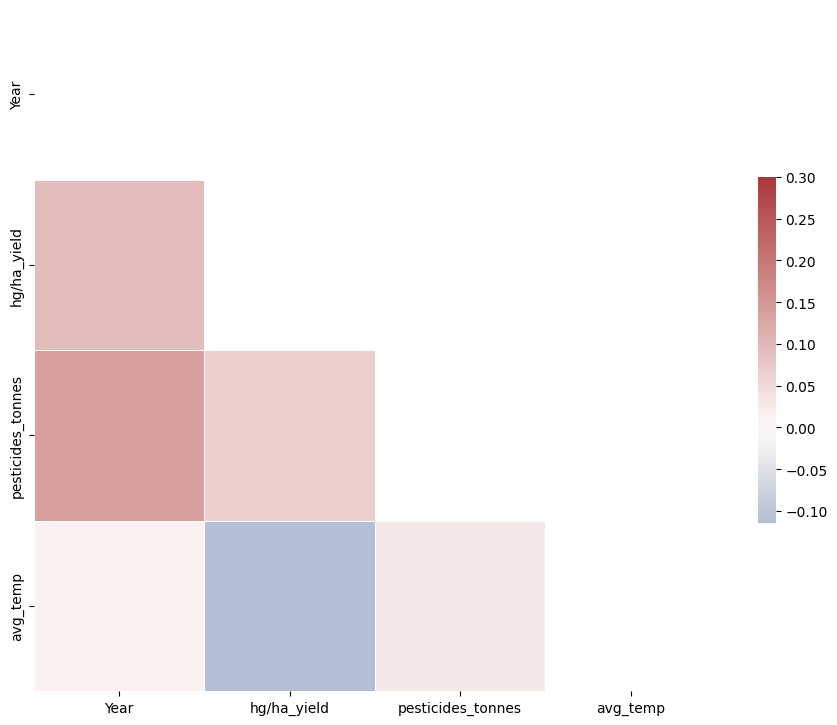

In [39]:
correlation_data=yield_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.palette="vlag"
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

It can be seen from the above correlation map that there is no correlation between any of the colmuns in the dataframe. 

# Section 3: Data Preprocessing

In [40]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Maize,1991,29068,1485,121.0,15.36
2,Albania,Maize,1992,24876,1485,121.0,16.06
3,Albania,Maize,1993,24185,1485,121.0,16.05
4,Albania,Maize,1994,25848,1485,201.0,16.96


### Encoding Categorical Variables:
There are two categorical columns in the dataframe, and we will use One-Hot Encoding to convert these two columns to one-hot numeric array.
The categorical value represents the numerical value of the entry in the dataset. This encoding will create a binary column for each category and returns a matrix with the results. 


In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
label=yield_df['hg/ha_yield']
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1991,1485,121.0,15.36,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1992,1485,121.0,16.06,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1993,1485,121.0,16.05,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1994,1485,201.0,16.96,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [43]:
 # Verify 'Year' exists
if 'Year' in features.columns:
    features = features.drop('Year', axis=1)
print(features.columns) 


Index(['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp',
       'Country_Albania', 'Country_Algeria', 'Country_Angola',
       'Country_Argentina', 'Country_Armenia', 'Country_Australia',
       'Country_Austria',
       ...
       'Item_Cassava', 'Item_Maize', 'Item_Plantains and others',
       'Item_Potatoes', 'Item_Rice, paddy', 'Item_Sorghum', 'Item_Soybeans',
       'Item_Sweet potatoes', 'Item_Wheat', 'Item_Yams'],
      dtype='object', length=114)


In [44]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28248 entries, 0 to 28247
Columns: 114 entries, average_rain_fall_mm_per_year to Item_Yams
dtypes: bool(111), float64(2), string(1)
memory usage: 3.6 MB



### Scaling Features: 

As seen in the data exploration section, the final dataframe contains features highly varying in magnitudes, units and range. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

In [45]:
print(features.dtypes)  # Inspect column types

average_rain_fall_mm_per_year    string[python]
pesticides_tonnes                       float64
avg_temp                                float64
Country_Albania                            bool
Country_Algeria                            bool
                                      ...      
Item_Sorghum                               bool
Item_Soybeans                              bool
Item_Sweet potatoes                        bool
Item_Wheat                                 bool
Item_Yams                                  bool
Length: 114, dtype: object


In [46]:
# Find columns with strings
non_numeric = features.select_dtypes(include=['object', 'bool']).columns
print(non_numeric)

Index(['Country_Albania', 'Country_Algeria', 'Country_Angola',
       'Country_Argentina', 'Country_Armenia', 'Country_Australia',
       'Country_Austria', 'Country_Azerbaijan', 'Country_Bahamas',
       'Country_Bahrain',
       ...
       'Item_Cassava', 'Item_Maize', 'Item_Plantains and others',
       'Item_Potatoes', 'Item_Rice, paddy', 'Item_Sorghum', 'Item_Soybeans',
       'Item_Sweet potatoes', 'Item_Wheat', 'Item_Yams'],
      dtype='object', length=111)


In [47]:
features['average_rain_fall_mm_per_year'] = pd.to_numeric(
    features['average_rain_fall_mm_per_year'], 
    errors='coerce'  # Converts invalid strings to NaN
)
# Convert all boolean columns to integers
bool_cols = features.select_dtypes(include='bool').columns
features[bool_cols] = features[bool_cols].astype(int)
print(features.dtypes)    

average_rain_fall_mm_per_year      Int64
pesticides_tonnes                float64
avg_temp                         float64
Country_Albania                    int64
Country_Algeria                    int64
                                  ...   
Item_Sorghum                       int64
Item_Soybeans                      int64
Item_Sweet potatoes                int64
Item_Wheat                         int64
Item_Yams                          int64
Length: 114, dtype: object


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)


After dropping year column in addition to scaling all values in features, the resulting array will look something like this : 

In [49]:
import numpy as np

# Find rows WITHOUT any NaN values
non_nan_mask = ~np.isnan(features).any(axis=1)

# Filter features and labels
features_clean = features[non_nan_mask]
label_clean = label[non_nan_mask]

label

0        36613
1        29068
2        24876
3        24185
4        25848
         ...  
28243    30000
28244    27681
28245    26274
28246    24420
28247    22888
Name: hg/ha_yield, Length: 28248, dtype: int64

In [50]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 4.79045997e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.02896082e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 9.08240940e-03, 6.63713799e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 9.17806494e-03, 6.54855196e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

## Training Data: 

The dataset will be split to two datasets, the training dataset and test dataset.



In [51]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

In [52]:
#write final df to csv file 
yield_df.to_csv('yield_df.csv')

In [53]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

# Section 4: Model Comparison & Selection 
For this project, we'll compare between the following models : 

- Gradient Boosting Regressor
- Random Forest Regressor
- SVM 
- Decision Tree Regressor


In [54]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
    RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
    DecisionTreeRegressor()
]

In [56]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

# 1. Handle NaN values BEFORE scaling
# Convert features to numpy array if it's a DataFrame
if hasattr(features, 'values'):
    features = features.values

# Find rows without NaN values
non_nan_mask = ~np.isnan(features).any(axis=1)
features_clean = features[non_nan_mask]
label_clean = label[non_nan_mask]

# 2. Scale the cleaned features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features_clean)

# 3. Train-test split on CLEANED data
train_data, test_data, train_labels, test_labels = train_test_split(
    features_scaled, 
    label_clean, 
    test_size=0.3, 
    random_state=42
)

# 4. Model comparison function
def compare_models(model):
    model_name = model.__class__.__name__
    model.fit(train_data, train_labels)
    y_pred = model.predict(test_data)
    r2 = r2_score(test_labels, y_pred)
    return [model_name, r2]

# 5. Initialize and compare models
models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
    RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
    DecisionTreeRegressor()
]

results = list(map(compare_models, models))
print(*results, sep="\n")

['GradientBoostingRegressor', 0.8957918626438968]
['RandomForestRegressor', 0.6907655921247855]
['SVR', -0.1935660137136721]
['DecisionTreeRegressor', 0.9589394826441846]


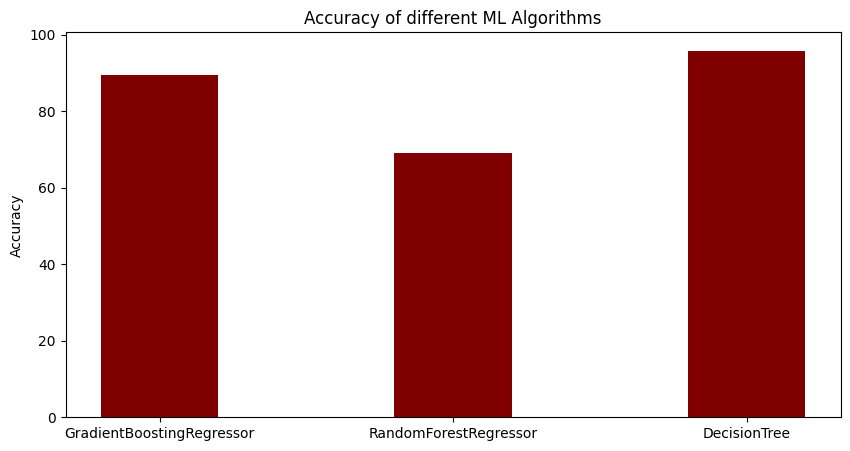

In [57]:
fig = plt.figure(figsize = (10, 5))
plt.bar(['GradientBoostingRegressor','RandomForestRegressor','DecisionTree'], [89.57918626438968,69.07655921247855,95.90081738278514], color ='maroon',width=0.4)
plt.ylabel("Accuracy")
plt.title("Accuracy of different ML Algorithms")
plt.show()

The evaluation metric is set based on **R^2 (coefficient of determination)** regression score function, that will represents the proportion of the variance for items (crops) in the regression model. **R^2** score shows how well terms (data points) fit a curve or line.

From the results above, **Decision Tree Regressor** has the highest R^2 score 0f **96%**, **GradientBoostingRegressor** comes second. 

In [58]:
#yield_df_onehot = yield_df_onehot.drop(['Year'], axis=1)

In [59]:
yield_df_onehot.head()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,36613,1485,121.0,16.37,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1991,29068,1485,121.0,15.36,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1992,24876,1485,121.0,16.06,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1993,24185,1485,121.0,16.05,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1994,25848,1485,201.0,16.96,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [60]:
# 1. First, verify the exact column counts
print(f"test_data shape: {test_data.shape}")  # Should show (8473, 114)
print(f"Original columns: {len(yield_df_onehot.columns)}")  # Likely 115
print(f"Columns without target: {len(yield_df_onehot.columns) - 1}")

# 2. Get ALL feature columns (excluding target)
feature_columns = [col for col in yield_df_onehot.columns if col != 'hg/ha_yield']

# 3. Handle the mismatch (if any)
if len(feature_columns) != test_data.shape[1]:
    print("Column count mismatch detected!")
    print("Model expects:", test_data.shape[1])
    print("Available features:", len(feature_columns))

    extra_cols = set(feature_columns) - set(yield_df.columns)
    print("Potential extra column(s):", extra_cols)

    print("Adjusting columns: Using first", test_data.shape[1], "feature columns")
    feature_columns = feature_columns[:test_data.shape[1]]

# 4. Create the DataFrame
test_df = pd.DataFrame(test_data, columns=feature_columns)

# 5. Verify
print(f"Final DataFrame shape: {test_df.shape}")
print(f"Columns assigned: {len(test_df.columns)}")


test_data shape: (8473, 114)
Original columns: 116
Columns without target: 115
Column count mismatch detected!
Model expects: 114
Available features: 115
Potential extra column(s): {'Country_Romania', 'Country_Saudi Arabia', 'Country_Cameroon', 'Item_Rice, paddy', 'Country_Haiti', 'Country_Poland', 'Country_Chile', 'Item_Sorghum', 'Item_Potatoes', 'Country_Tunisia', 'Item_Soybeans', 'Item_Wheat', 'Country_United Kingdom', 'Country_Zambia', 'Country_Guinea', 'Country_Slovenia', 'Country_Bahamas', 'Country_Burkina Faso', 'Country_South Africa', 'Country_Libya', 'Country_Madagascar', 'Country_Greece', 'Country_Suriname', 'Country_Switzerland', 'Country_Austria', 'Country_Norway', 'Country_Thailand', 'Country_Spain', 'Country_Belarus', 'Country_Jamaica', 'Country_Lebanon', 'Country_Lesotho', 'Country_Hungary', 'Country_Kenya', 'Country_Mali', 'Country_Ukraine', 'Country_Ecuador', 'Country_Honduras', 'Country_Rwanda', 'Item_Sweet potatoes', 'Country_Uruguay', 'Country_Zimbabwe', 'Country_Ir

In [61]:
cols = yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].columns[:test_data.shape[1]]
test_df = pd.DataFrame(test_data, columns=cols)

# cntry=test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
# cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
# countries=[i.split("_")[1] for i in cntrylist]
# itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
# itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
# items=[i.split("_")[1] for i in itmlist]
# Get one-hot item columns
item_cols = [col for col in test_df.columns if 'Item_' in col]
country_cols = [col for col in test_df.columns if 'Country_' in col]

# Recover item names using idxmax (returns first max — assumes one-hot)
item_names = test_df[item_cols].idxmax(axis=1).str.replace('Item_', '')
country_names = test_df[country_cols].idxmax(axis=1).str.replace('Country_', '')

# Assign back to test_df
test_df['Item'] = item_names
test_df['Country'] = country_names


In [62]:
test_df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item,Country
0,0.183443,0.090370,0.535264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Soybeans,South Africa
1,0.458451,0.000135,0.631005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Plantains and others,Lithuania
2,0.183443,0.132330,0.552300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Soybeans,South Africa
3,1.000000,0.179695,0.867802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sorghum,Chile
4,0.458451,0.000305,0.629983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Potatoes,Lithuania


In [63]:
test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col],axis=1,inplace=True)
test_df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.183443,0.090370,0.535264,0.0
1,0.458451,0.000135,0.631005,0.0
2,0.183443,0.132330,0.552300,0.0
3,1.000000,0.179695,0.867802,0.0
4,0.458451,0.000305,0.629983,0.0


In [64]:
# test_df['Country'] = countries[:8473]
# Stack just the Item columns
item_stacked = test_df[[col for col in test_df.columns if 'Item' in col]].stack()

# Reset to DataFrame
item_df = item_stacked.reset_index()
item_df.columns = ['Row', 'Item_col', 'Item']

# item_df now has 7853 rows — consistent


# test_df['Country']=countries
# test_df['Item']=items
test_df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.183443,0.090370,0.535264,0.0
1,0.458451,0.000135,0.631005,0.0
2,0.183443,0.132330,0.552300,0.0
3,1.000000,0.179695,0.867802,0.0
4,0.458451,0.000305,0.629983,0.0


In [65]:
# Safely grab the one column that contains the 'Item'
item_cols = [col for col in test_df.columns if 'Item' in col]

# Check how many 'Item' columns you have
print(item_cols)

# If exactly one column, assign it directly
if len(item_cols) == 1:
    test_df['Item'] = test_df[item_cols[0]]
elif len(item_cols) > 1:
    # If multiple, pick the first non-null per row
    test_df['Item'] = test_df[item_cols].bfill(axis=1).iloc[:, 0]
else:
    print("No column containing 'Item' found.")



[]
No column containing 'Item' found.


In [66]:
print(yield_df.columns)


Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')


In [67]:
item_train, item_test = train_test_split(
    yield_df['Item'], test_size=0.2, random_state=42
)


test_df['Item'] = item_test.reset_index(drop=True)




In [68]:
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)
test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

C:\Users\asus\AppData\Local\Temp\ipykernel_23772\4160730319.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))


Item
Cassava                 0.973571
Maize                   0.961722
Plantains and others    0.905775
Potatoes                0.955186
Rice, paddy             0.960486
Sorghum                 0.949129
Soybeans                0.963708
Sweet potatoes          0.939164
Wheat                   0.961682
Yams                    0.982385
dtype: float64

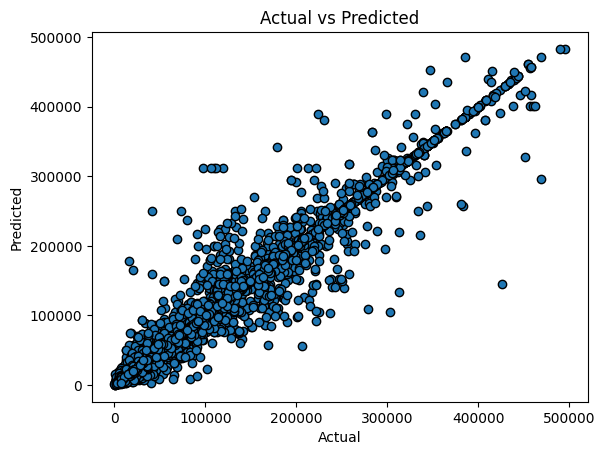

In [69]:
fig, ax = plt.subplots() 
ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

The figure above shows the goodness of the fit with the predictions visualized as a line. It can be seen that R Square score is excellent. This means that we have found a good fitting model to predict the crops yield value for a certain country.  

In [70]:
def adjusted_r_squared(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score
test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x))

C:\Users\asus\AppData\Local\Temp\ipykernel_23772\2407580481.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x))


Item
Cassava                 0.973051
Maize                   0.961353
Plantains and others    0.897669
Potatoes                0.954770
Rice, paddy             0.960049
Sorghum                 0.948422
Soybeans                0.963209
Sweet potatoes          0.938271
Wheat                   0.961292
Yams                    0.981476
dtype: float64

# Section 5: Model Results & Conclusions



In [71]:
print(len(model.feature_importances_))
print(len(yield_df_onehot.columns[yield_df_onehot.columns != "hg/ha_yield"]))


114
115


In [72]:
# Recreate feature_columns cleanly
all_columns = [col for col in yield_df_onehot.columns if col != "hg/ha_yield"]

# Match feature count to model
expected_feature_count = len(model.feature_importances_)
feature_columns = all_columns[:expected_feature_count]  # Truncate to match model

# Force lengths into variables
importances = model.feature_importances_
features = feature_columns

print("Feature importance shape:", len(importances))
print("Feature names shape:", len(features))

# See which one is wrong
if len(importances) != len(features):
    raise ValueError(f"Mismatch! importances: {len(importances)}, features: {len(features)}")








Feature importance shape: 114
Feature names shape: 114


In [73]:
# Safely grab the one column that contains the 'Item'
item_cols = [col for col in test_df.columns if 'Item' in col]

# Check how many 'Item' columns you have
print(item_cols)

# If exactly one column, assign it directly
if len(item_cols) == 1:
    test_df['Item'] = test_df[item_cols[0]]
elif len(item_cols) > 1:
    # If multiple, pick the first non-null per row
    test_df['Item'] = test_df[item_cols].bfill(axis=1).iloc[:, 0]
else:
    print("No column containing 'Item' found.")



['Item']


Getting only top 7 of features importance in the model:

In [74]:
# Correct way to create `varimp` first
varimp = {
    "names": feature_columns,  # list of 114 feature names
    "imp": model.feature_importances_  # array of 114 importance scores
}


C:\Users\asus\AppData\Local\Temp\ipykernel_23772\3744945406.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);


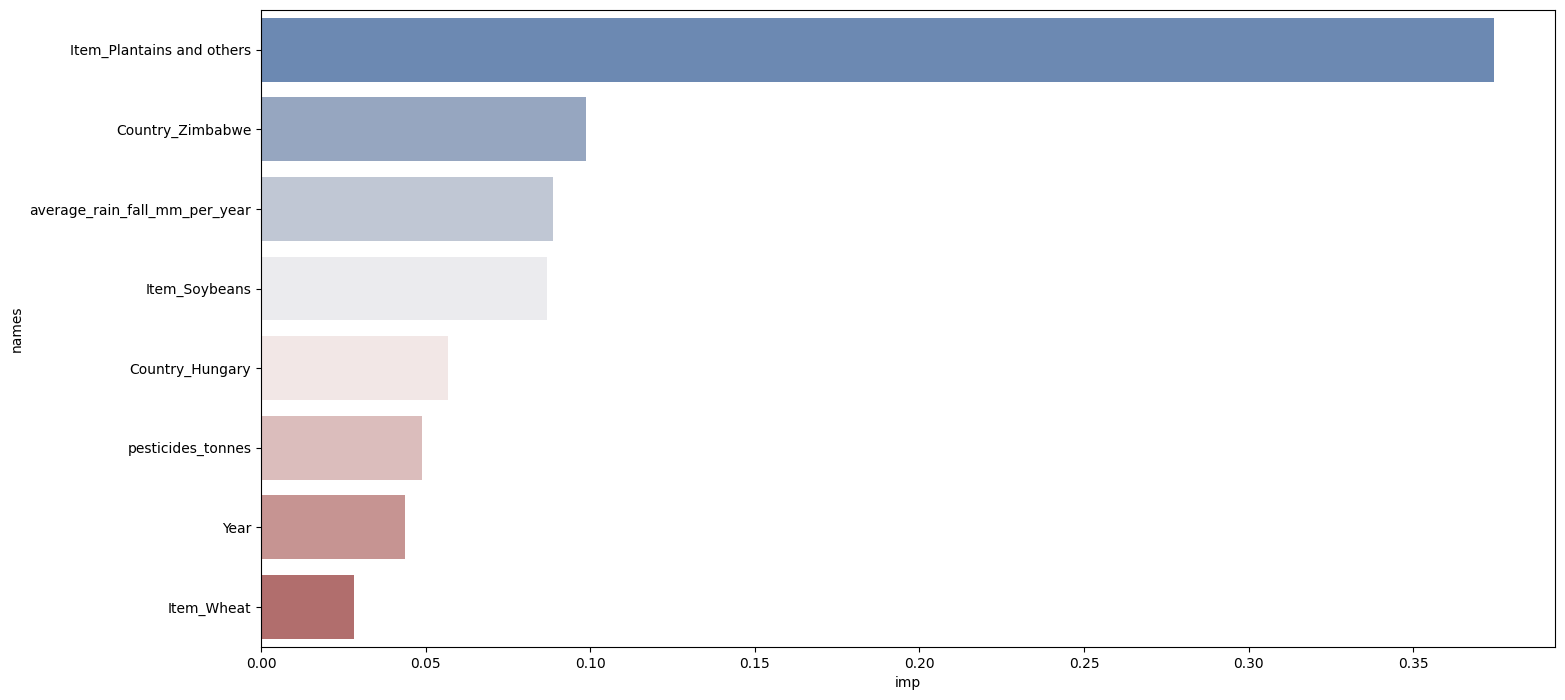

In [75]:
#7 most important factors that affect crops 
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
df=df.nlargest(8, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

The crop being potatoes has the highest importance in the decision making for the model, where it's the highest crops in the dataset. Cassava too, then as expected we see the effect of pesticides, where its the third most important feature, and then if the crop is sweet potatoes, we see some of the highest crops in features importance in dataset. 

If the crop is grown in India, makes sense since India has the largest crops sum in the dataset. Then comes rainfall and temprature.

C:\Users\asus\AppData\Local\Temp\ipykernel_23772\4285038496.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yield_df,ax=ax)


<Axes: xlabel='Item', ylabel='hg/ha_yield'>

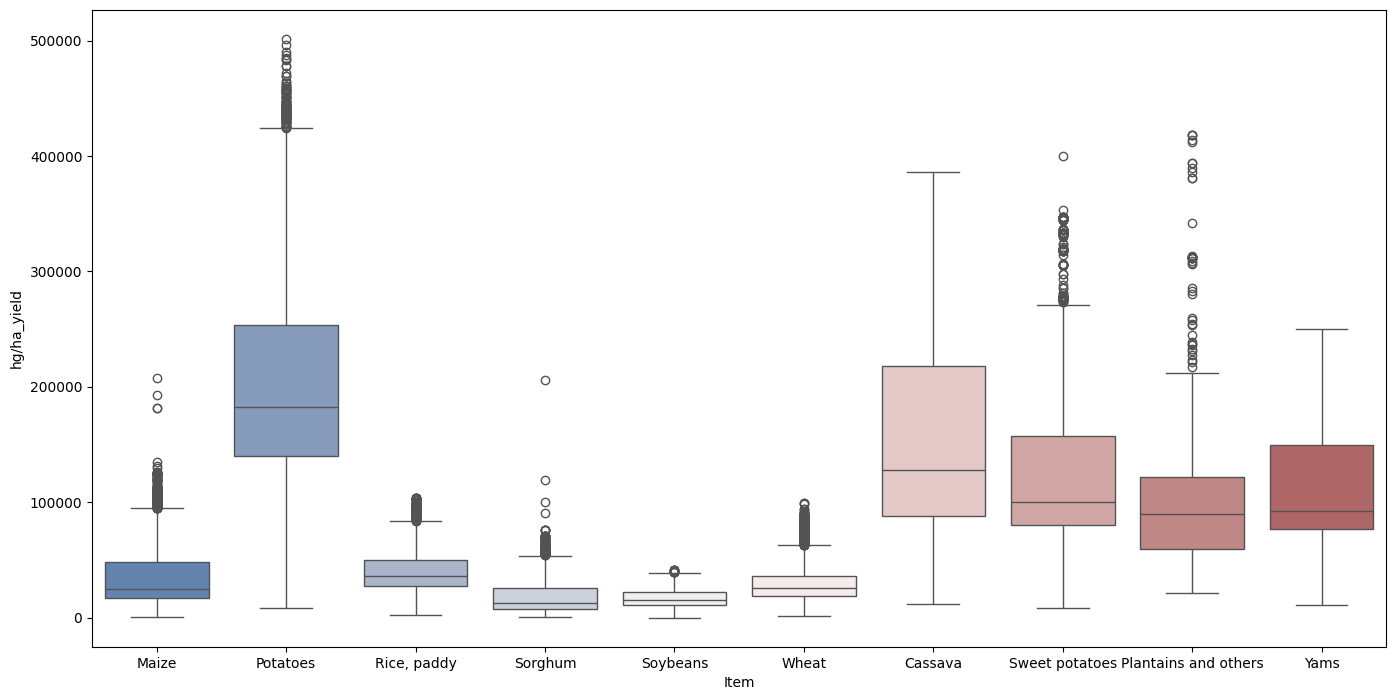

In [76]:
#Boxplot that shows yield for each item 
a4_dims = (16.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yield_df,ax=ax)